In [100]:
!pip install sympy matplotlib numpy scipy IPython ipywidgets

In [101]:
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import  Latex
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
# embed figures into the notebook
%matplotlib inline
from tikzplotlib import save as tikz_save


In [102]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [103]:
N = 200                                # Number of points in each direction
x_start, x_end = -2.875, 2.875            # x-direction boundaries
y_start, y_end = -1.5, 1.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

kappa = np.pi/2                      # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet



In [104]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)


In [105]:
u_inf = 1.0        # freestream speed

u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

In [106]:
def trayectory(coord0,dt):
    dx = np.diff(X).max()
    x0,y0 = coord0
    nxi = (np.abs(x0-X)).argmin()
    nyi = (np.abs(y0-Y.T)).argmin()
    uxi,uyi = [u[nyi,nxi],v[nyi,nxi]]
    x1,y1 = x0+uxi*dt,y0+uyi*dt
    return x1,y1

In [107]:
#Trayectory
tiempos = np.linspace(0,6,200)
dt = tiempos[1]
x1,y1 = np.tile(np.zeros_like(tiempos),[2,1])
coord0 = [-2.5,0.25]
for i,ti in enumerate(tiempos):
    coord1 = trayectory(coord0,dt)
    x1[i],y1[i] = coord1    
    coord0 = coord1

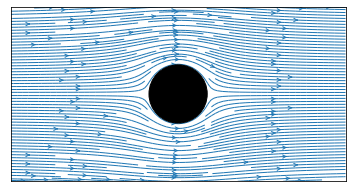

In [108]:
dirout = '/home/juan/Documents/Publicaciones/2022_CAF/animate_cyl1/'
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax = plt.subplots()

ax.set_xlabel(r'$x/D$', fontsize=16)
ax.set_ylabel(r'$y/D$', fontsize=16)
ax.set_xlim(x_start, x_end)
ax.set_ylim(y_start, y_end)
ax.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=.8, arrowstyle='->')
#ax.contour(X, Y, psi,
#               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
ax.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
lin2 = ax.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o',zorder=11);

ax.set_aspect('equal')
cilindro = plt.Circle((0,0),x_stagn1, color='k',zorder=10)
ax.add_patch(cilindro)
fig.savefig(dirout+'potential_01',dpi=200,bbox_inches='tight')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.savefig(dirout+'potential_02',dpi=200,bbox_inches='tight')
lin2.remove()
fig.savefig(dirout+'potential_03',dpi=200,bbox_inches='tight')
for i,x1i in enumerate(x1):
    y1i = y1[i]
    lin, = ax.plot(x1i,y1i,'go')
    fig.savefig(dirout+'trajectory_%03d'%i,dpi=200,bbox_inches='tight')
    lin.remove()


(3.4814814814814814, 5.7555555555555555)

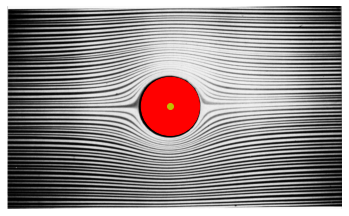

In [93]:
A = plt.imread('/home/juan/Documents/Publicaciones/2022_CAF/images/cilindro_peregrine_re01.png')

im_A = A[315:1255]
fig1,ax1 = plt.subplots()
ax1.imshow(im_A);
ax1.axis('off');
ax1.grid(color='red')
n1,m1,k1 = im_A.shape
nxc,nyc = [m1/2-20,n1/2-6]
ax1.plot(nxc,nyc,'yo');
cyl1 = plt.Circle((nxc,nyc),135,color='r')
ax1.add_patch(cyl1)


n1/270,m1/270

In [67]:
n1,m1,7.2/2

(940, 1554, 3.6)

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import  Latex
from ipywidgets import interact, interact_manual,interactive,widgets,Layout

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{\left(\frac{z\pi}{a}\right)^2}{m^2\pi^2}\right)\right)$$

The product is actually the formula for the sine and the complex potential becomes

$$w = \frac{j\Gamma}{2\pi}\ln\left(\sin\left(\frac{z\pi}{a}\right)\right)$$

In [ ]:
w,z,Gamma,a,m = sp.symbols('w,z,\Gamma,a,m')

In [ ]:
ws =  1j*Gamma/(2*sp.pi)*sp.log(z*sp.product(1-(z*sp.pi/a)**2/(m**2*sp.pi**2),(m,1,31)))
w = 1j*Gamma/(2*sp.pi)*sp.log(sp.sin(z*sp.pi/a))

In [ ]:
Us = sp.diff(ws,z);
U = sp.diff(w,z);

In [ ]:
Us.evalf(subs={Gamma:10, a:1,z:.1})

In [ ]:
U.evalf(subs={Gamma:10, a:1,z:.1})